<a href="https://colab.research.google.com/github/saimasharleen/A-Visual-Search-Engine-for-Image-Retrieval-using-Feature-Distance-Metrics/blob/main/resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connecting Google Drive with Colab
from google.colab import drive
import zipfile
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install fastai

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.vision.all import *

path = Path('/content/gdrive/MyDrive/ML/dataset/Data/training')

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=40),
    get_y=lambda x: parent_label(x) if parent_label(x) != 'Thomas_Day' else None,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
).dataloaders(path, num_workers=4)




Data Explorations

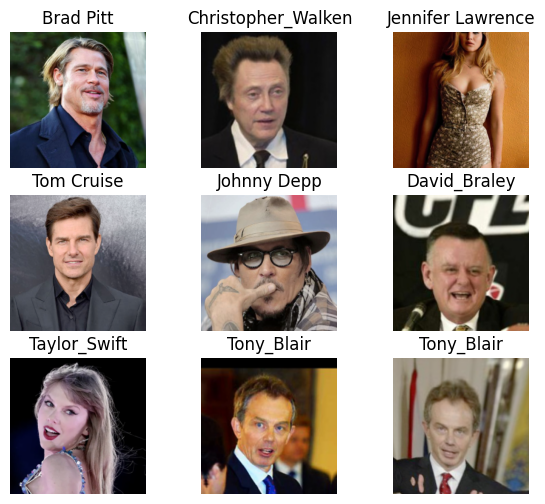

In [ ]:
data.show_batch(nrows=3, figsize=(7,6))


Print Classes present in the data

In [ ]:
data

In [ ]:
print(isinstance(data, DataLoaders))


True


In [ ]:
n_classes = len(data.vocab)
print(n_classes)


413


In [ ]:
from fastai.vision.all import *

learn = cnn_learner(data, resnet18, metrics=[accuracy])


SuggestedLRs(valley=0.0012022644514217973)

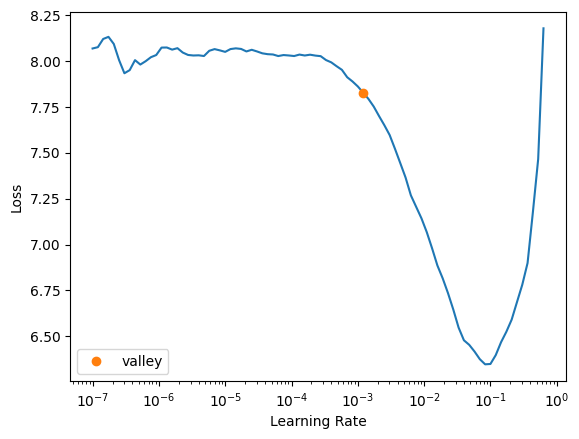

In [ ]:
learn.lr_find()


In [ ]:
print(isinstance(learn, Learner))


True


In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(10, slice(lr1, lr2))

In [ ]:
#hyper parameter tuning
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()